In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
#### EDA : Exploratary Data Analysis
df.info() ## There is no Missing Value in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df.shape

(200, 5)

In [16]:
df_ss_above_50 = df[df["Spending Score (1-100)"] >= 50]
df_ss_below_50 = df[df["Spending Score (1-100)"] < 50]

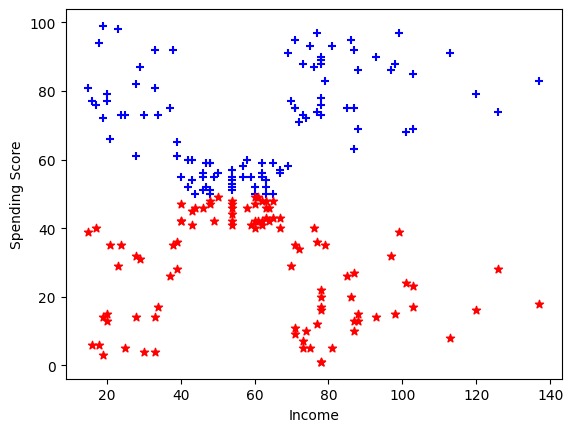

In [18]:
plt.scatter(df_ss_above_50["Annual Income (k$)"],df_ss_above_50["Spending Score (1-100)"],color="blue",marker="+")
plt.scatter(df_ss_below_50["Annual Income (k$)"],df_ss_below_50["Spending Score (1-100)"],color="red",marker="*")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.show()

In [20]:
from sklearn.cluster import KMeans

cols = ["Age","Annual Income (k$)","Spending Score (1-100)"]
inputs = df[cols]
inputs

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [21]:
k_values = []
sse = []
for k in range(1,11):
  km = KMeans(n_clusters=k)
  km.fit(inputs)
  k_values.append(k)
  sse.append(km.inertia_)


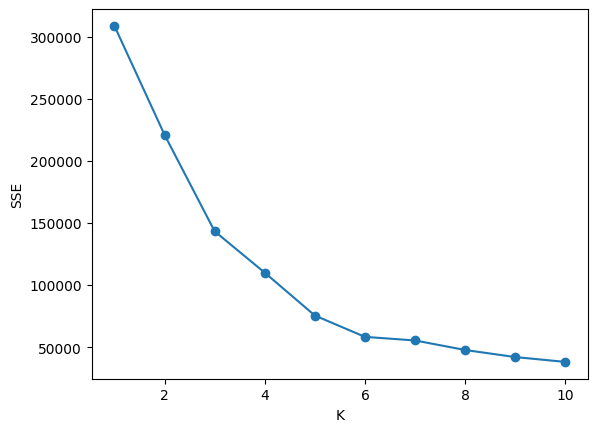

In [24]:
plt.plot(k_values,sse,marker="o")
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()

In [25]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(inputs)

In [26]:
y_predicted

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 4, 1, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4], dtype=int32)

In [29]:
df["clusters"] = y_predicted

In [30]:
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
173,174,Male,36,87,92,4
131,132,Male,39,71,75,4
88,89,Female,34,58,60,1
163,164,Female,31,81,93,4
75,76,Male,26,54,54,1
105,106,Female,21,62,42,1
115,116,Female,19,65,50,1
74,75,Male,59,54,47,1
149,150,Male,34,78,90,4
144,145,Male,25,77,12,3


In [31]:
df0  = df[df["clusters"] == 0]
df1  = df[df["clusters"] == 1]
df2  = df[df["clusters"] == 2]
df3  = df[df["clusters"] == 3]
df4  = df[df["clusters"] == 4]

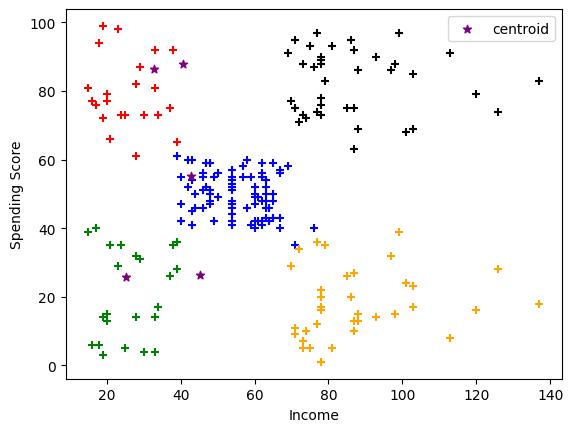

In [36]:
plt.scatter(df0["Annual Income (k$)"],df0["Spending Score (1-100)"],color="red",marker="+")
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"],color="blue",marker="+")
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"],color="green",marker="+")
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"],color="orange",marker="+")
plt.scatter(df4["Annual Income (k$)"],df4["Spending Score (1-100)"],color="black",marker="+")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroid")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[cols]  = scaler.fit_transform(df[cols])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,0.019231,0.000000,0.387755,2
1,2,Male,0.057692,0.000000,0.816327,0
2,3,Female,0.038462,0.008197,0.051020,2
3,4,Female,0.096154,0.008197,0.775510,0
4,5,Female,0.250000,0.016393,0.397959,2
...,...,...,...,...,...,...
195,196,Female,0.326923,0.860656,0.795918,4
196,197,Female,0.519231,0.909836,0.275510,3
197,198,Male,0.269231,0.909836,0.744898,4
198,199,Male,0.269231,1.000000,0.173469,3


In [42]:
inputs = df[cols]
inputs

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959
...,...,...,...
195,0.326923,0.860656,0.795918
196,0.519231,0.909836,0.275510
197,0.269231,0.909836,0.744898
198,0.269231,1.000000,0.173469


In [43]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(inputs)
df["clusters"] = y_predicted

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,0.019231,0.000000,0.387755,2
1,2,Male,0.057692,0.000000,0.816327,2
2,3,Female,0.038462,0.008197,0.051020,2
3,4,Female,0.096154,0.008197,0.775510,2
4,5,Female,0.250000,0.016393,0.397959,2
...,...,...,...,...,...,...
195,196,Female,0.326923,0.860656,0.795918,0
196,197,Female,0.519231,0.909836,0.275510,1
197,198,Male,0.269231,0.909836,0.744898,0
198,199,Male,0.269231,1.000000,0.173469,1


In [47]:
df0  = df[df["clusters"] == 0]
df1  = df[df["clusters"] == 1]
df2  = df[df["clusters"] == 2]
df3  = df[df["clusters"] == 3]
df4  = df[df["clusters"] == 4]

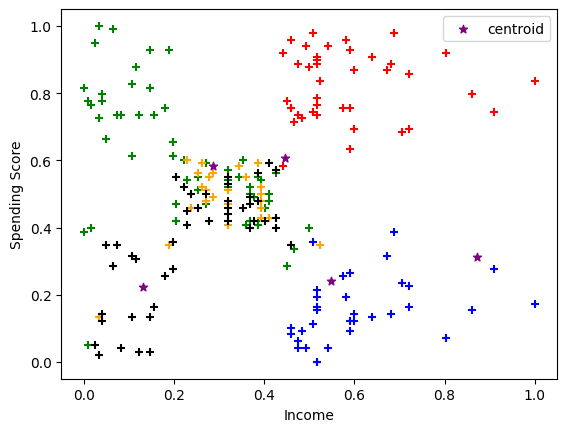

In [46]:
plt.scatter(df0["Annual Income (k$)"],df0["Spending Score (1-100)"],color="red",marker="+")
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"],color="blue",marker="+")
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"],color="green",marker="+")
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"],color="orange",marker="+")
plt.scatter(df4["Annual Income (k$)"],df4["Spending Score (1-100)"],color="black",marker="+")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroid")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [53]:
### Feature Selection only two columns  (Annual Income and Spending)
cols = ["Annual Income (k$)","Spending Score (1-100)"]
df2 = df.copy()

inputs = df2[cols]
inputs

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
...,...,...
195,0.860656,0.795918
196,0.909836,0.275510
197,0.909836,0.744898
198,1.000000,0.173469


In [54]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(inputs)
df2["clusters"] = y_predicted
df2

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,0.019231,0.000000,0.387755,3
1,2,Male,0.057692,0.000000,0.816327,1
2,3,Female,0.038462,0.008197,0.051020,3
3,4,Female,0.096154,0.008197,0.775510,1
4,5,Female,0.250000,0.016393,0.397959,3
...,...,...,...,...,...,...
195,196,Female,0.326923,0.860656,0.795918,2
196,197,Female,0.519231,0.909836,0.275510,0
197,198,Male,0.269231,0.909836,0.744898,2
198,199,Male,0.269231,1.000000,0.173469,0


In [55]:
df0  = df2[df2["clusters"] == 0]
df1  = df2[df2["clusters"] == 1]
df2  = df2[df2["clusters"] == 2]
df3  = df2[df2["clusters"] == 3]
df4  = df2[df2["clusters"] == 4]

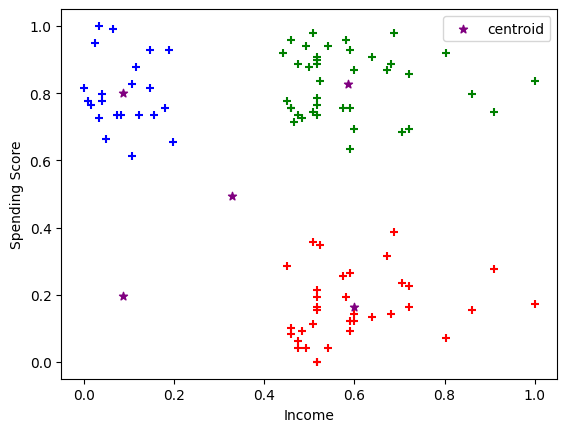

In [57]:
plt.scatter(df0["Annual Income (k$)"],df0["Spending Score (1-100)"],color="red",marker="+")
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"],color="blue",marker="+")
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"],color="green",marker="+")
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"],color="orange",marker="+")
plt.scatter(df4["Annual Income (k$)"],df4["Spending Score (1-100)"],color="black",marker="+")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroid")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()